# Week 5

## Part 1: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercise:* Questions from DAOST Chapter 3.

> Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?

When plotted as a scatter plot, the pattern in the data is obviously visible. Our eyes do not require any smoothing curves or approximations to confirm the existence of a relationship between x and y.



> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?

In the financial market, if a price becomes sufficiently low, one of two things may occur.

> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?

The book mentions weighted splines which are constructed from piecewise polynomial functions and a method known as LOESS which is short for locally wieghted regression. Finally, another method is exponential smoothing where you take the weighted moving average and use that to smooth the curve of time series data

> * What are residuals? Why is it a good idea to plot the residuals of your fit?

The difference between the smoothed approximation and the actual data is defined as the residual. We can determine how close our approximation is to the true distribution by analyzing residuals (e.g. they should be trend free and balanced). Furthermore, by plotting the residuals, the user may notice some dynamics that the model did not capture. For example, if the residual plot shows an exponentially increasing error, the model is most likely missing an exponential part.

> * Explain in your own words the point of the smooth tube in figure 3-7.

By adding two more smooth curves above and below the overall smoothing line, we achieve the same effect as plotting a confidence interval. Maybe not statistically, but it will give us an idea of what to expect.

> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?

Our eyes are most sensitive to change when the slopes of curves are approximately 45 degrees. Banking is the process of changing the aspect ratio of the entire plot so that the majority of the slopes are at a 45-degree angle. However, banking is not a universal solution. If it causes a plot to become too skewed or loses too much detail, it is probably best to reconsider the entire visualization.

> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

`Graphical Analysis` and Presentation Graphics both have data visualization at their core, but are vastly different activites. Graphical Analysis aims to explore new data and patterns, it is more of an exploratory phase. This means that we want to produce a lot of plots and inspect the data from many different angles. 

After finding new information, we want to explain some previously discovered information about data to an audience  who don't have the same knowledge as us. In order to do this effectively, these visualizations need to be detailed and easy to understand.. This process is called ' `Presentation Graphics`  and is similar to the explanatory phase.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 
> * What kind of relationships will a semi-log plot help you discover?

A semi-log plot can help you discover relationships that involve exponential growth or decay. It can also help in visualizing data that covers a wide range of values.

> * What kind of functions will loglog plots help you see?

 Α log-log plot is a graph that uses a logarithmic scale on both axes. It is commonly used to represent power law relationships, where one variable is proportional to a power of the other variable. Log-log plots can help you see the relationship between two variables when the relationship is not easily apparent on a linear scale. They can also help in visualizing data that spans several orders of magnitude.

> * Second  we are going to create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. 


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
# Load the csv data into pandas dataframe
df= pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv') 

# Add a column year based on the column Date
df['Year'] = df.Date.apply(lambda text: text.split('/')[2]) 

# Drop YEAR 2018 due to missing data
year_index=df[df.Year=='2018'].index
df.drop(year_index, inplace=True)

<AxesSubplot: title={'center': 'Crime occurencies by category wiith y-axis on log-scale'}, xlabel='Category', ylabel='Occurances'>

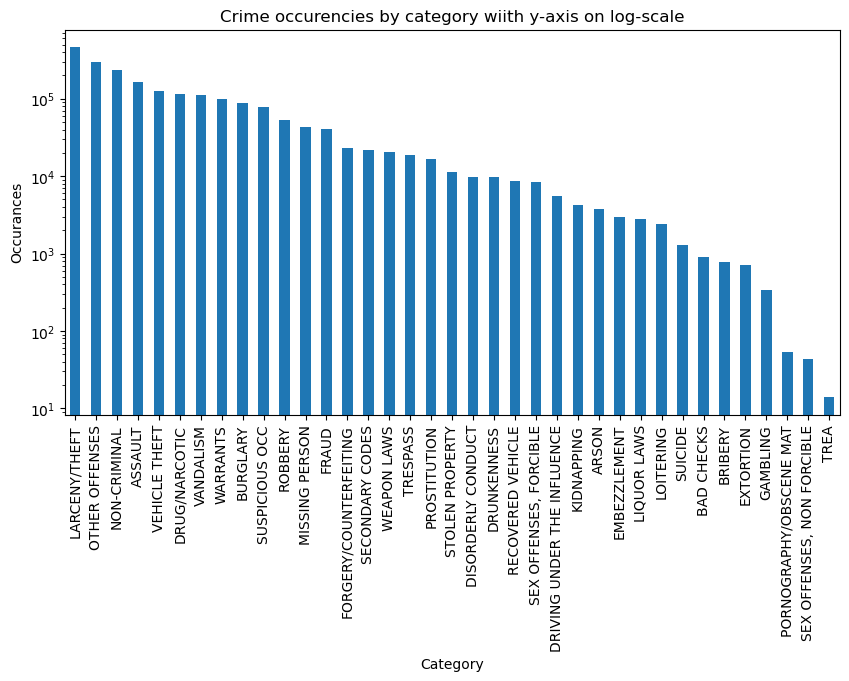

In [161]:
# List the number of crimes in each category.
category = df['Category'].value_counts()
# Plot 
plt.figure(figsize = (10,5))
plt.title('Crime occurencies by category wiith y-axis on log-scale')
plt.ylabel("Occurances")
plt.xlabel("Category")
category.plot.bar(logy=True)

> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. 
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).

In [213]:
# Remove geographical outliers
df_2 = df[(df.Y < 50) & (df.X<-122)]

# Compute the distance between two lonlat coordinates using haversine distance.
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# Figuring out the square that incapsulates our data (San Fransisco)
lat_min = df_2.Y.min()
lat_max = df_2.Y.max()
lon_min = df_2.X.min()
lon_max = df_2.X.max()

print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")
# --> Grid size 130 x 125 bins

# Wikilink: https://en.wikipedia.org/wiki/Haversine_formula
# implementation in python: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

Estimated bin amount along the western border of San Fransisco: 125.36317921721148
Estimated bin amount along the eastern border of San Fransisco: 125.36317921721148
Estimated bin amount along the northern border of San Fransisco: 130.78123566673807
Estimated bin amount along the southern border of San Fransisco: 130.9807444161078


- *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).

In [318]:
# Count the number of thefts occurring within each grid-square (use all data for all time).
df_3_THEFT = df_2[df_2.Category=="LARCENY/THEFT"]
count, lon, lat = np.histogram2d(df_3_THEFT.Y, df_3_THEFT.X, bins = [130,125])

- *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
> * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
- *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
- *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.

In [319]:
def tally(k):
    # noinspection PyTypeChecker
    return sum(sum(count == k))

K = range(int(count.max()))

tallies = [tally(k) for k in K]

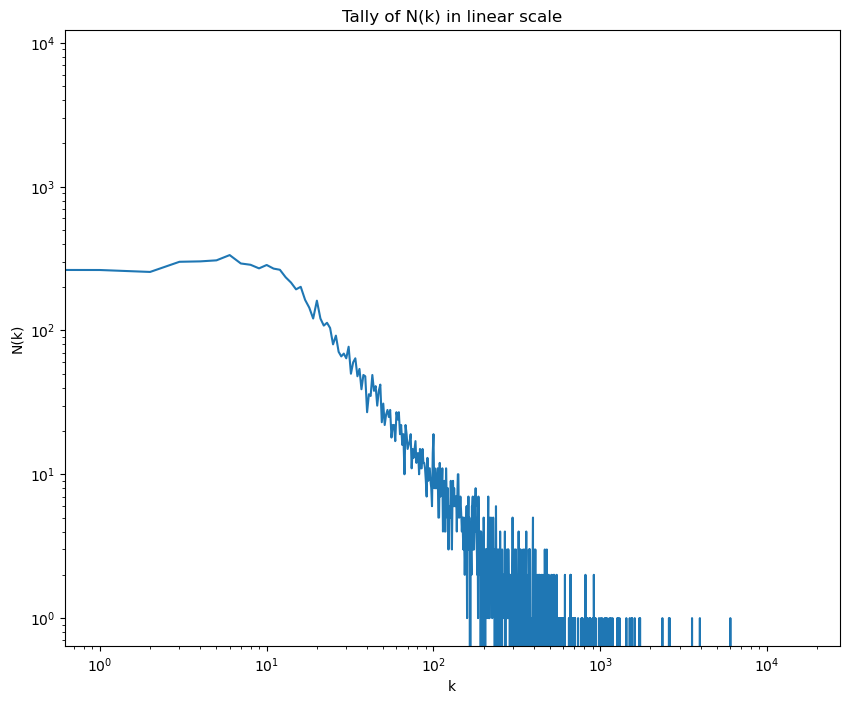

In [344]:
fig = plt.figure(figsize=(10,8))
plt.loglog(K, tallies)
plt.xlabel('k')
plt.ylabel('N(k)')
plt.title('Tally of N(k) in linear scale')
plt.show()

>   
>   

>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

This is partailly correct as when plot the quantiites against each other with logarithmic axes we can see a linear relationship after 10 crimes but not all over. 

## Part 2: Linear Regression
> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [345]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

In [394]:
df_2['hour_of_week'] = df_2['Time'].apply(lambda x: int(x.split(':')[0])) + pd.to_datetime(df_2.Date).dt.day_of_week  * 24
group_hour_of_week = df_2[df_2.Category.isin(focuscrimes)].groupby([hour_of_week, 'Category']).size().unstack()

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_21255/1869561441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['hour_of_week'] = df_2['Time'].apply(lambda x: int(x.split(':')[0])) + pd.to_datetime(df_2.Date).dt.day_of_week  * 24


In [ ]:
# Create a subset of the data grouped by category and Week_hour
data_cat = df_2.groupby(["Category", "hour_of_week"]).size().reset_index(name="Occurences")

focuscrimes_list = list(focuscrimes)

# Create a color gradient going from red to blue. Hour 1 is red, hour 168 is blue
cmap = plt.cm.get_cmap('RdBu')

# Create subplots of scatter plots comparing each category to each other
rows = 0
cols = 0
fig, ax = plt.subplots(nrows=23, ncols=4, figsize=(20, 100))
for i in range(len(focuscrimes_list)):
    for j in range(i+1, len(focuscrimes_list)):
        # the dimension cannot be i,j, since it goes from 14-14-j. We instead make a counter on rows of cols, which creates our figure.
        ax[rows, cols].scatter(data_cat.loc[data_cat.Category==focuscrimes_list[i]].Occurences, data_cat.loc[data_cat.Category==focuscrimes_list[j]].Occurences, c=data_cat.loc[data_cat.Category==focuscrimes_list[i]].hour_of_week, alpha=0.5, cmap=cmap)
        ax[rows, cols].set_xlabel(focuscrimes_list[i])
        ax[rows, cols].set_ylabel(focuscrimes_list[j])
        # Color each point according to the Week_hour by cmap
        cols += 1
        if cols == 4:
            cols = 0
            rows += 1
plt.show()

It looks like A LOT of the crimes are correlated with each other, just to name a few:

Weapon Laws vs
* Assault
* Larceny/Theft
* Vandalism
* Vehicle Theft
* Stolen Property


DUI vs
* Drunkenness
* Robbery
* Assault


Robbery vs
* Assault
* Drunkenness
* Vandalism

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, I actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise:* Linear regression.

> * Using the formulas we derived above (Equation 1 and 2), calculate the slopes for $a$ and $b$ in each case. (You can compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.)
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.)
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Create a final mega-plot with all of the 91 megaplots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes.